In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import matplotlib.ticker as ticker
os.chdir("")

In [2]:
# import csvs from las-x segmentation grouped by condition/embryo as 'sample'
file_lists={"mcherry_e1":[i for i in glob.glob('mch_z9_1.csv')],
            "mcherry_e2":[i for i in glob.glob('mch_z7_2.csv')],
            "mcherry_e3":[i for i in glob.glob('mch_z7_3.csv')],

            "mcherry+mcitrine_e1":[i for i in glob.glob('mch+mcit_z7_1.csv')],
            "mcherry+mcitrine_e2":[i for i in glob.glob('mch+mcit_2_mch.csv')],
            "mcherry+mcitrine_e3":[i for i in glob.glob('mch+mcit_3_mch.csv')],
            "mcherry+mcitrine_e4":[i for i in glob.glob('mch+mcit_4_mch.csv')],
            
             "mcherry-mcitrine_e1":[i for i in glob.glob('mch-mcit_1_mch.csv')],
            "mcherry-mcitrine_e2":[i for i in glob.glob('mch-mcit_2_mch.csv')],
            "mcherry-mcitrine_e3":[i for i in glob.glob('mch-mcit_3_mch.csv')]}

In [3]:
file_lists

{'mcherry_e1': ['mch_z9_1.csv'],
 'mcherry_e2': ['mch_z7_2.csv'],
 'mcherry_e3': ['mch_z7_3.csv'],
 'mcherry+mcitrine_e1': ['mch+mcit_z7_1.csv'],
 'mcherry+mcitrine_e2': ['mch+mcit_2_mch.csv'],
 'mcherry+mcitrine_e3': ['mch+mcit_3_mch.csv'],
 'mcherry+mcitrine_e4': ['mch+mcit_4_mch.csv'],
 'mcherry-mcitrine_e1': ['mch-mcit_1_mch.csv'],
 'mcherry-mcitrine_e2': ['mch-mcit_2_mch.csv'],
 'mcherry-mcitrine_e3': ['mch-mcit_3_mch.csv']}

In [4]:
# make dataframe with columns for int (pixel intensity 0-4095), rois (counts of pixels in each nucleus with given intensity value), filename and sample
data=pd.DataFrame()
for name, items in file_lists.items():
    for csv in items:
        df=pd.read_csv(csv,encoding="utf16",skiprows=2,header=None)
        colnames = ["int", "ROI1", "ROI2", "ROI3", "ROI4", "ROI5", "ROI6", "ROI7", "ROI8", "ROI9", "ROI10",
                   "ROI11", "ROI12", "ROI13", "ROI14", "ROI15", "ROI16", "ROI17", "ROI18", "ROI19", "ROI20",
                   "ROI21", "ROI22", "ROI23", "ROI24", "ROI25", "ROI26", "ROI27", "ROI28", "ROI29", "ROI30"]
        df.columns=colnames[0:df.shape[1]]
        df["filename"]=os.path.basename(csv)
        df["sample"]=name
        
        data=data.append(df)

In [5]:
data

,int,ROI1,ROI2,ROI3,ROI4,ROI5,ROI6,ROI7,ROI8,ROI9,...,sample,ROI11,ROI12,ROI13,ROI14,ROI15,ROI16,ROI17,ROI18,ROI19
0,0,8,15,5,30,42,9,12,44,33,...,mcherry_e1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,5,5,1,15,8,6,3,10,15,...,mcherry_e1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,9,6,2,7,7,4,3,10,14,...,mcherry_e1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,5,5,1,10,15,6,5,8,11,...,mcherry_e1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2,6,4,12,7,8,6,8,11,...,mcherry_e1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4091,4091,0,0,0,0,0,0,0,0,0,...,mcherry-mcitrine_e3,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4092,4092,0,0,0,0,0,0,0,0,0,...,mcherry-mcitrine_e3,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4093,4093,0,0,0,0,0,0,0,0,0,...,mcherry-mcitrine_e3,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4094,4094,0,0,0,0,0,0,0,0,0,...,mcherry-mcitrine_e3,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [6]:
# melt dataframe to have columns for intensity (0-4095), filename, sample, ROI (nucleus), value (pixel counts)
datamelt=data.melt(id_vars=["int","filename","sample"],var_name="roi",value_name="value")

# remove rows with empty values
datamelt=datamelt.dropna(subset=["value"])

In [7]:
datamelt

,int,filename,sample,roi,value
0,0,mch_z9_1.csv,mcherry_e1,ROI1,8.0
1,1,mch_z9_1.csv,mcherry_e1,ROI1,5.0
2,2,mch_z9_1.csv,mcherry_e1,ROI1,9.0
3,3,mch_z9_1.csv,mcherry_e1,ROI1,5.0
4,4,mch_z9_1.csv,mcherry_e1,ROI1,2.0
...,...,...,...,...,...
770043,4091,mch-mcit_1_mch.csv,mcherry-mcitrine_e1,ROI19,0.0
770044,4092,mch-mcit_1_mch.csv,mcherry-mcitrine_e1,ROI19,0.0
770045,4093,mch-mcit_1_mch.csv,mcherry-mcitrine_e1,ROI19,0.0
770046,4094,mch-mcit_1_mch.csv,mcherry-mcitrine_e1,ROI19,0.0


In [8]:
# add columns for condition, embryo, nucleus_id
datamelt[["condition", "embryo"]]= datamelt["sample"].str.split('_', expand=True)
datamelt["nucleus_id"]=datamelt["condition"]+"_"+datamelt["embryo"]+"_"+datamelt["roi"]

In [9]:
#calculate average mch intensity per nucleus
# sum of pixels*intensity per nucleus/ sum of pixels per nucleus
datamelt["n_pixels"] = datamelt.groupby(["nucleus_id"])["value"].transform("sum")
datamelt["int_x_value"] = datamelt["value"]*datamelt["int"]
datamelt["avg_int"] = datamelt.groupby(["nucleus_id"])["int_x_value"].transform("sum") / datamelt["n_pixels"]

In [11]:
# drop duplicates to clean dataframe
mcherry = datamelt[["nucleus_id", "avg_int","condition","embryo","sample"]].drop_duplicates()
mcherry

,nucleus_id,avg_int,condition,embryo,sample
0,mcherry_e1_ROI1,11.200000,mcherry,e1,mcherry_e1
4096,mcherry_e2_ROI1,4.722689,mcherry,e2,mcherry_e2
8192,mcherry_e3_ROI1,10.418033,mcherry,e3,mcherry_e3
12288,mcherry+mcitrine_e1_ROI1,4.532258,mcherry+mcitrine,e1,mcherry+mcitrine_e1
16384,mcherry+mcitrine_e2_ROI1,17.219780,mcherry+mcitrine,e2,mcherry+mcitrine_e2
...,...,...,...,...,...
679936,mcherry+mcitrine_e4_ROI17,20.080000,mcherry+mcitrine,e4,mcherry+mcitrine_e4
684032,mcherry-mcitrine_e1_ROI17,22.457447,mcherry-mcitrine,e1,mcherry-mcitrine_e1
720896,mcherry+mcitrine_e4_ROI18,19.797980,mcherry+mcitrine,e4,mcherry+mcitrine_e4
724992,mcherry-mcitrine_e1_ROI18,45.078947,mcherry-mcitrine,e1,mcherry-mcitrine_e1


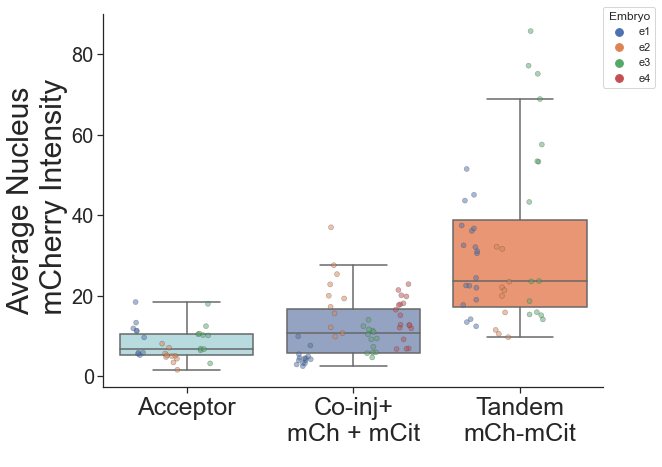

In [14]:
# plot mean mcherry intensity of individual nuclei across conditions, grouped by embryo

#make palette
palette = {"mcherry-mcitrine":"#fc8d62",
           "mcherry+mcitrine":"#8da0cb",
           "mcherry":"powderblue"}

#order of conditions to plot
order =["mcherry","mcherry+mcitrine","mcherry-mcitrine"]

#font for graph
sns.set(font="Arial",style="ticks")

#bar and scatterplots
ax=sns.catplot(data=mcherry, x="condition", y="avg_int", kind="box", palette=palette, order=order, showfliers=False, legend=False, height = 6, aspect = 1.3, )
ax=sns.stripplot(data=mcherry, x="condition", y="avg_int",  order=order, hue="embryo",  marker="o", alpha=0.5, jitter = 0.2, dodge = True , size = 5, linewidth=0.5)

#set x and y axis labels
ax.set_xlabel(" ")
ax.set_ylabel("Average Nucleus\n mCherry Intensity",fontsize=30)

# set x axis tick labels
ax.set_xticklabels(["Acceptor", "Co-inj+\nmCh + mCit","Tandem\nmCh-mCit"], fontsize = 25)

#set y axis tick intervals and font size
ax.yaxis.set_major_locator(ticker.MultipleLocator(20))
plt.yticks(fontsize=20)

#get legend for embryos
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:4], labels[:4], title='Embryo', bbox_to_anchor=(1, 1.02), loc='upper left' , borderaxespad=0)

#save plot

plt.savefig("e3_SE_mean_mch_int_594nm.png",dpi=300, bbox_inches='tight')

In [12]:
mcherry.to_csv("se-fret_594.csv")